In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

/mnt/data/psemchyshyn/conda/miniconda/envs/top-detection/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
array_size = 512

# Define the size of your grid
grid_size = 10

# Generate the grid points
x = np.linspace(0, array_size-1, grid_size)
y = np.linspace(0, array_size-1, grid_size)

# Generate a grid of coordinates
xv, yv = np.meshgrid(x, y)

# Convert the numpy arrays to lists
xv_list = xv.tolist()
yv_list = yv.tolist()

# Combine the x and y coordinates into a list of list of lists
input_points = np.array([[[int(x), int(y)] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xv_list, yv_list)])

input_points = torch.tensor(input_points).view(1, grid_size*grid_size, 2)

In [3]:
input_points.shape

torch.Size([1, 100, 2])

In [8]:


device = "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

img_url1 = '/mnt/data/psemchyshyn/top-detection/mlc_training_data/images/nbzhxauwbe.png'
img_url2 = '/mnt/data/psemchyshyn/top-detection/mlc_training_data/images/qlopnzcixa.png'

img_url1 = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
img1 = np.asarray(Image.open(requests.get(img_url1, stream=True).raw).convert("RGB"))
img2 = np.asarray(Image.open(img_url2))


images = [img1, img2]
# input_points = [[[450, 600]]]  # 2D location of a window in the image
input_points = None
# prompt = [0, 0, 512, 512]

inputs = processor(images, input_boxes=[[[[0, 0, 300, 300], [300, 300, 500, 500]]], [[[0, 0, 300, 300], [300, 300, 500, 500]]]], return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs, multimask_output=False)

# masks = processor.image_processor.post_process_masks(
#     outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
# )
# scores = outputs.iou_scores

In [4]:


device = "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

img_url1 = '/mnt/data/psemchyshyn/top-detection/mlc_training_data/images/nbzhxauwbe.png'
img_url2 = '/mnt/data/psemchyshyn/top-detection/mlc_training_data/images/qlopnzcixa.png'

img_url1 = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
img1 = np.asarray(Image.open(requests.get(img_url1, stream=True).raw).convert("RGB"))
img2 = np.asarray(Image.open(img_url2))


images = [img1, img2]
# input_points = [[[450, 600]]]  # 2D location of a window in the image
# prompt = [0, 0, 512, 512]

inputs = processor(images, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs, input_points=torch.stack([input_points]*2), multimask_output=False)

# masks = processor.image_processor.post_process_masks(
#     outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
# )
# scores = outputs.iou_scores

In [5]:
outputs.pred_masks.shape

torch.Size([2, 1, 1, 256, 256])

In [32]:
inputs['pixel_values'].shape

torch.Size([2, 3, 1024, 1024])

In [75]:
outputs.pred_masks.shape

torch.Size([2, 1, 1, 256, 256])

In [9]:
image = np.asarray(images[1])
mask = torch.sigmoid(outputs.pred_masks[1][0]).permute(1, 2, 0).cpu().numpy()

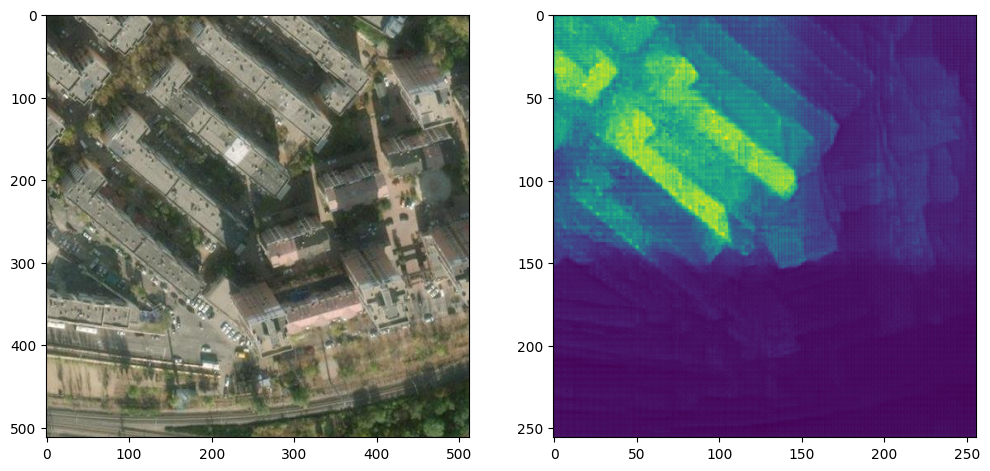

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.imshow(image)
ax2.imshow(mask)

NameError: name 'mask_roof_gt' is not defined

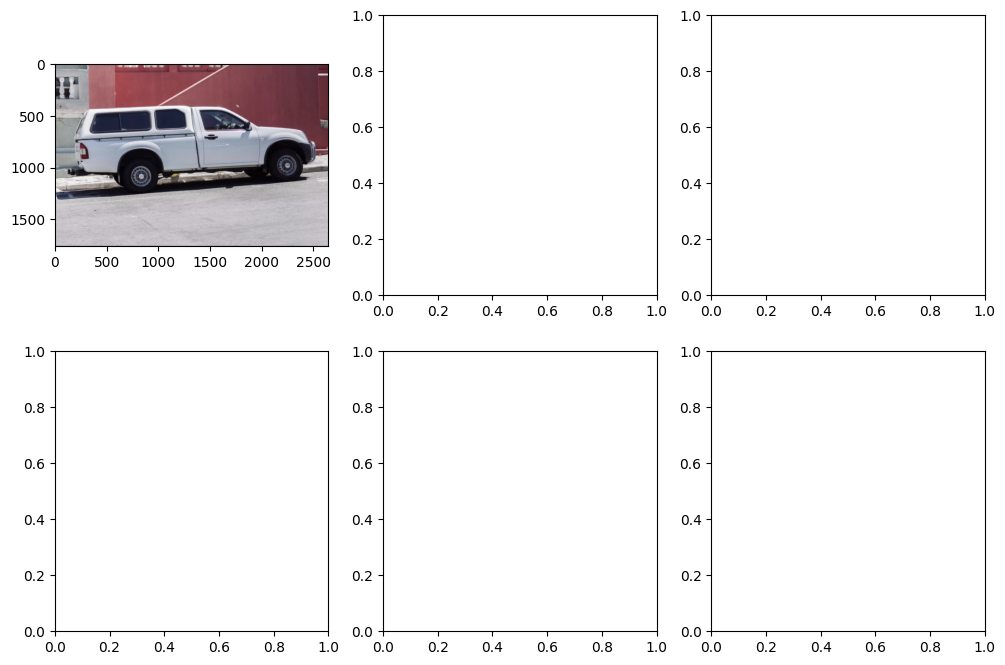

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))
ax1.imshow(image)
ax2.imshow(mask_roof_gt)
ax3.imshow(mask_height_gt)
ax4.imshow(image)
ax5.imshow(mask_roof_pred)
ax6.imshow(mask_height_pred)
plt.show()
